In [1]:
import numpy as np
import pandas as pd
import pickle
from IPython.display import display_html
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from nltk import sent_tokenize

In [2]:
import os
import sys
shared_path = '../shared/'
if shared_path not in sys.path:
    sys.path.append(shared_path)
    
clr_path = '../contra-lexrank'
if clr_path not in sys.path:
    sys.path.append(clr_path)

mmd_path = '../mmd'
if mmd_path not in sys.path:
    sys.path.append(mmd_path)

In [3]:
from Argument import Argument
from DataHandler import DataHandler
from ArgumentativenessScorer import ArgumentativenessScorer
from FeaturedArgument import FeaturedArgument

In [4]:
AMSC_PATH = '../../not-gitted/dataset_as_json_file.pickle'

In [5]:
data = DataHandler()
data.load_bin(AMSC_PATH)

In [6]:
filtered_arguments = data.get_filtered_arguments([DataHandler.get_args_filter_length(length=3)])

In [7]:
arg_scorer = ArgumentativenessScorer(
    calculation=None,
    discourse_markers='C:/Users/Jonas/git/thesis/code/contra-lexrank/discourse-markers.txt',
    claim_lexicon='C:/Users/Jonas/git/thesis/code/contra-lexrank/ClaimLexicon.txt'
)

In [8]:
filtered_arguments = arg_scorer.transform(filtered_arguments)

# Are claims rather at the beginning of an argument or at the end?

In [11]:
[(a,b) for a, b in zip(filtered_arguments[0].sentences, filtered_arguments[0].argumentativeness_scores[0])]

[('In 2011 there were about 730,322 abortions reported to the centers for disease control.',
  0.07692307692307693),
 ("There are about 1.7% of abortion of women's ages from 15-44 each year.",
  0.15384615384615385),
 ('Women who already had abortion earlier in there life time have abortion again.',
  0.23076923076923078),
 ('At the age of 45 a women will have at least one abortion.',
  0.15384615384615385),
 ('By the 12th week of pregnancies 88.7% of women have abortion.',
  0.15384615384615385),
 ('In the U.S. black women are 3.3 times likely to have an abortion than white women.',
  0.23076923076923078)]

In [7]:
np.argsort([1,3,2])

array([0, 2, 1], dtype=int64)

In [15]:
sent_idx_ordered_asc_argscores = list()
for argument in filtered_arguments:
    indices = np.argsort(argument.argumentativeness_scores[0])
    indices_length_normalized = indices/(len(argument.sentences)-1)
    sent_idx_ordered_asc_argscores.append(indices_length_normalized)
    break

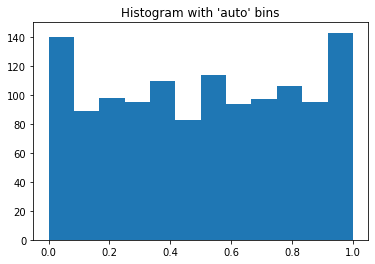

In [13]:
plt.hist(np.hstack(sent_idx_ordered_asc_argscores), bins='auto')

plt.title("Histogram with 'auto' bins")
plt.show()

In [9]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [27]:
x = list()
y = list()
for argument in filtered_arguments:
    arg_scores = argument.argumentativeness_scores[0]
    indices = np.arange(len(arg_scores))
    indices_length_normalized = indices/(len(argument.sentences)-1)
    x.extend(indices_length_normalized)
    y.extend(arg_scores)

In [21]:
len(x), len(y)

(9, 9)

In [25]:
[a.sentences for a in filtered_arguments[:2]]

[['In 2011 there were about 730,322 abortions reported to the centers for disease control.',
  "There are about 1.7% of abortion of women's ages from 15-44 each year.",
  'Women who already had abortion earlier in there life time have abortion again.',
  'At the age of 45 a women will have at least one abortion.',
  'By the 12th week of pregnancies 88.7% of women have abortion.',
  'In the U.S. black women are 3.3 times likely to have an abortion than white women.'],
 ['Abortion is wrong!', 'Abortion Is gross!', 'Abortion is MURDER!!!!']]

In [26]:
[a.argumentativeness_scores[0] for a in filtered_arguments[:2]]

[array([0.07692308, 0.15384615, 0.23076923, 0.15384615, 0.15384615,
        0.23076923]),
 array([0.5 , 0.25, 0.25])]

In [22]:
x, y

([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 0.0, 0.5, 1.0],
 [0.07692307692307693,
  0.15384615384615385,
  0.23076923076923078,
  0.15384615384615385,
  0.15384615384615385,
  0.23076923076923078,
  0.5,
  0.25,
  0.25])

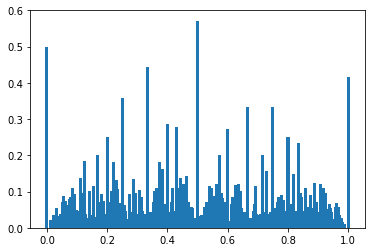

In [28]:
plt.bar(x=x, height=y, width=.01)
plt.show()

In [30]:
ARGSME_PATH = '../../not-gitted/argsme-1.0-cleaned/args-me-1.0-cleaned-as-list.json'

In [31]:
with open(ARGSME_PATH, 'r') as file:
    argsme_json = json.load(file)
    
argsme = list()
for a in tqdm(argsme_json):
    argsme.append(
        Argument(topic=a['context']['discussionTitle'],
                       query=a['context']['discussionTitle'],
                       arg_id=a['id'], 
                       sentences=sent_tokenize(a['premises'][0]['text']))
    )

100%|████████████████████████████████████████████████████████████████████████| 382545/382545 [04:11<00:00, 1521.32it/s]


In [32]:
argsme = arg_scorer.transform(argsme)

No markers were found for argument c376f2b4-2019-04-18T17:22:19Z-00003-000.


In [38]:
x_prime = list()
y_prime = list()
for argument in tqdm(argsme):
    if len(argument.argumentativeness_scores) >0:
        y_prime.extend(argument.argumentativeness_scores[0])
        indices = np.arange(len(argument.sentences))
        indices_length_normalized = indices/(len(argument.sentences)-1)
        x_prime.extend(indices_length_normalized)

  0%|                                                                                       | 0/382545 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
100%|██████████████████████████████████████████████████████████████████████| 382545/382545 [00:03<00:00, 107307.94it/s]


In [40]:
len(x_prime), len(y_prime)

(6143992, 6143992)

In [ ]:
plt.bar(x=x_prime, height=y_prime)#, width=.01)
plt.show()